## Loading and Inspecting the Dataset

In [4]:
import pandas as pd

# Load the dataset
dataset_path = '16M_xdata.csv'
df = pd.read_csv(dataset_path, encoding='latin-1')


In [5]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
columns = ['target','id','date','flag','user','text']

In [7]:
df.columns = columns

In [8]:
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
unique_values = df['target'].unique()
print(unique_values)


[0 4]


In [10]:
df.shape

(1599999, 6)

## Preprocessing the data and Data Exploration

In [11]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK datasets
nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Define stopwords after downloads are complete
stop_words = set(stopwords.words('english'))

# Function to preprocess tweets
def preprocess_tweet(tweet):
    if not isinstance(tweet, str):  # Handle NaN or non-string inputs
        return ""

    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#'
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuation and numbers
    tweet = re.sub(r"[^a-zA-Z\s]", '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize
    word_tokens = word_tokenize(tweet)
    # Remove stop words
    filtered_tweet = [w for w in word_tokens if w.lower() not in stop_words]
    
    return " ".join(filtered_tweet)


# Apply preprocessing function
df['processed_text'] = df['text'].astype(str).apply(preprocess_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df['processed_text']

0          upset cant update facebook texting might cry r...
1          dived many times ball managed save rest go bounds
2                           whole body feels itchy like fire
3                                   behaving im mad cant see
4                                                 whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995              thewdbcom cool hear old walt interviews
1599996                      ready mojo makeover ask details
1599997    happy th birthday boo alll time tupac amaru sh...
1599998                                 happy charitytuesday
Name: processed_text, Length: 1599999, dtype: object

In [13]:
df['sentiment'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

In [14]:
df['sentiment']

0          0
1          0
2          0
3          0
4          0
          ..
1599994    1
1599995    1
1599996    1
1599997    1
1599998    1
Name: sentiment, Length: 1599999, dtype: int64

In [15]:
df = df[['processed_text', 'sentiment']]

In [16]:
df.head()

,processed_text,sentiment
0,upset cant update facebook texting might cry r...,0
1,dived many times ball managed save rest go bounds,0
2,whole body feels itchy like fire,0
3,behaving im mad cant see,0
4,whole crew,0


In [17]:
print("Duplicated in the dataset : ",df.duplicated().sum())

Duplicated in the dataset :  112035


In [18]:
df = df[~df.duplicated()].reset_index(drop = True)

In [19]:
print("Duplicated in the dataset : ",df.duplicated().sum())

Duplicated in the dataset :  0


In [20]:
df.shape

(1487964, 2)

In [21]:
df['sentiment'].unique()

array([0, 1])

In [22]:
df['sentiment'].value_counts()

sentiment
0    749074
1    738890
Name: count, dtype: int64

In [23]:
import matplotlib.pyplot as plt

<Axes: xlabel='sentiment'>

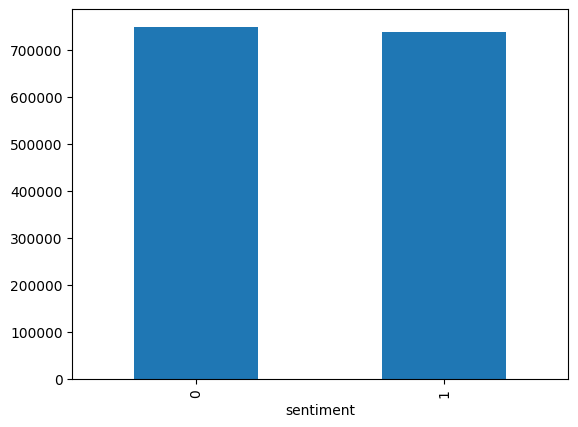

In [24]:
df['sentiment'].value_counts().plot.bar()

## Split the Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df['processed_text']
y = df['sentiment']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape[0]

1190371

In [29]:
X_test.shape[0]

297593

## Feature Extraction

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [32]:
print("TF-IDF matrix shape for training set: ",X_train_tfidf.shape)

TF-IDF matrix shape for training set:  (1190371, 5000)


In [33]:
print("TF-IDF matrix shape for testing set: ",X_test_tfidf.shape)

TF-IDF matrix shape for testing set:  (297593, 5000)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test_tfidf)

In [37]:
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy:  76.92015605205768
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    149665
           1       0.76      0.79      0.77    147928

    accuracy                           0.77    297593
   macro avg       0.77      0.77      0.77    297593
weighted avg       0.77      0.77      0.77    297593



In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to tune (fewer values for faster tuning)
param_grid = {
    'C': [0.1, 1, 10],  # Reduced values for regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Single solver to reduce iterations
}

# Initialize the model with fewer iterations
log_reg = LogisticRegression(max_iter=500)

# Grid Search with verbose output
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Get best parameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Evaluate on test data
y_pred = best_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7682
Test Accuracy: 0.7698


In [39]:
import h5py
import numpy as np

model_filename = "best_nlp_model.h5"

with h5py.File(model_filename, 'w') as h5f:
    h5f.create_dataset('coefficients', data=np.array(best_model.coef_))
    h5f.create_dataset('intercept', data=np.array(best_model.intercept_))
    h5f.create_dataset('classes', data=np.array(best_model.classes_))

print(f"Model saved as {model_filename}")


Model saved as best_nlp_model.h5


In [42]:
import h5py
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the model from .h5
model_filename = "best_nlp_model.h5"

with h5py.File(model_filename, 'r') as h5f:
    coefficients = np.array(h5f['coefficients'])
    intercept = np.array(h5f['intercept'])
    classes = np.array(h5f['classes'])

# Reconstruct the Logistic Regression model
loaded_model = LogisticRegression()
loaded_model.coef_ = coefficients
loaded_model.intercept_ = intercept
loaded_model.classes_ = classes

# Example test case
new_tweet = "The show is a complete waste!"
processed_tweet = preprocess_tweet(new_tweet)  # Ensure preprocess_tweet() is defined
tweet_tfidf = vectorizer.transform([processed_tweet])
sentiment = loaded_model.predict(tweet_tfidf)

# Convert prediction to readable output
sentiment_label = "Positive" if sentiment[0] == 1 else "Negative"
print(f"Predicted Sentiment: {sentiment_label}")


Predicted Sentiment: Negative
